In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import seaborn as sns 
import sklearn 

In [2]:
# Specify the directory containing the CSV files
csv_directory = "../dataset/Amazon/software/"

In [ ]:
# Use glob to get all CSV file paths
csv_files = glob.glob(csv_directory + "*.csv")

# Read and combine all CSV files into a single DataFrame
combined_csv = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Save the combined CSV to a new file (optional)
combined_csv.to_csv("combined_output.csv", index=False)

In [3]:
file = "../dataset/Amazon/software/combined_output.csv"

In [4]:
def readcsv1(file):
    df = pd.read_csv(file,usecols=['Unnamed: 0', 'overall', 'reviewTime','reviewText'])

    data_analysis = df.head(), df.info(), df.describe(), df.isnull().sum(), df.notnull().all()
    
    hist = df.hist(bins=50, figsize=(20,15)), plt.show()
    
    overall = print('Negative', round(df['overall'].value_counts()[-1]/len(df) * 100,2), '% of the dataset'),"\n", 
    print('Neutral', round(df['overall'].value_counts()[0]/len(df) * 100,2), '% of the dataset'),"\n", 
    print('Positive', round(df['overall'].value_counts()[1]/len(df) * 100,2), '% of the dataset'),"\n",
    print('Redundant Data', df.duplicated('Unnamed: 0').sum())
   
    return data_analysis


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375086 entries, 0 to 375085
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  375086 non-null  int64  
 1   overall     375086 non-null  float64
 2   reviewTime  375086 non-null  int64  
 3   reviewText  375072 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 11.4+ MB


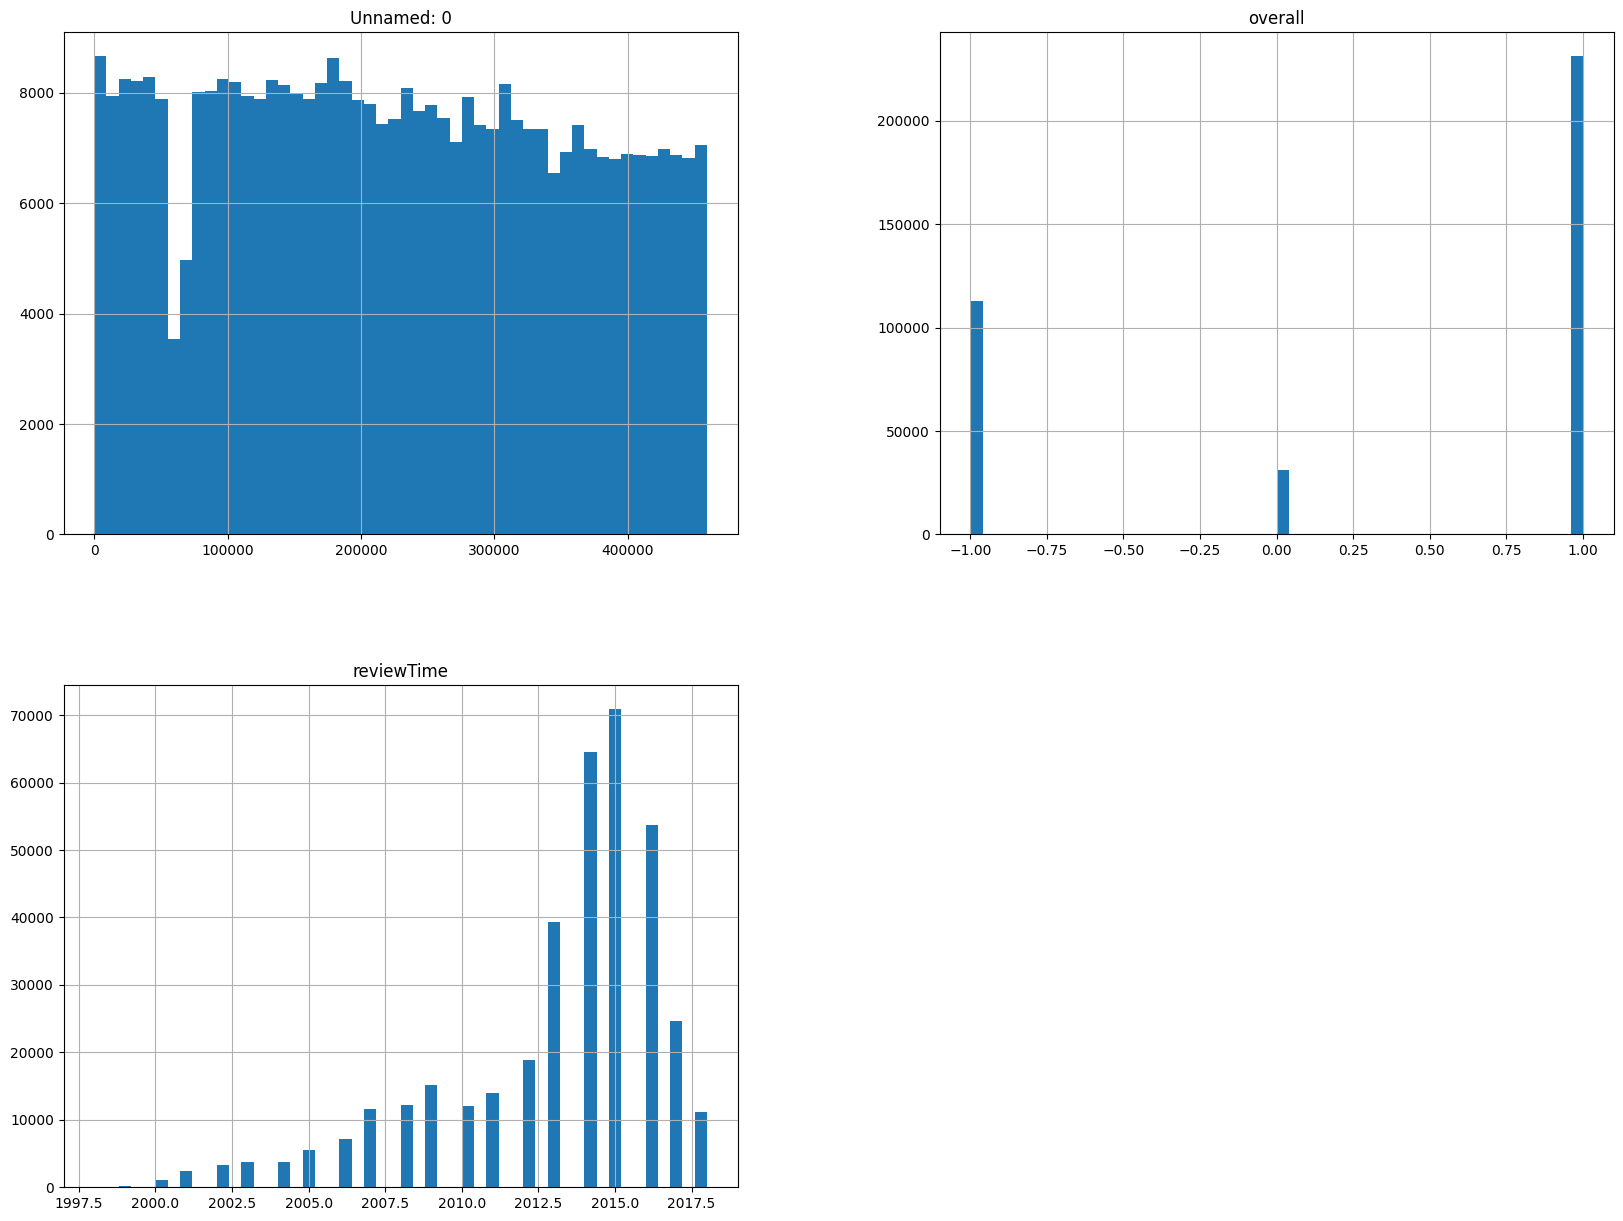

Negative 30.08 % of the dataset
Neutral 8.28 % of the dataset
Positive 61.64 % of the dataset
Redundant Data 0


(   Unnamed: 0  overall  reviewTime  \
 0           5      1.0        2011   
 1           6      0.0        2010   
 2           7      1.0        2010   
 3           8      1.0        2010   
 4           9      1.0        2010   
 
                                           reviewText  
 0  Strong backgroung, good read, quite up to date...  
 1  If you live on Mars and never heard of the int...  
 2  i got this book on amazon and it ended up savi...  
 3  I was very happy with this purchase because th...  
 4  Recieved in a timely manner- book in great con...  ,
 None,
           Unnamed: 0        overall     reviewTime
 count  375086.000000  375086.000000  375086.000000
 mean   224828.697512       0.315626    2013.005071
 std    131037.562735       0.904176       3.644336
 min         0.000000      -1.000000    1998.000000
 25%    114345.250000      -1.000000    2012.000000
 50%    221902.500000       1.000000    2014.000000
 75%    335261.750000       1.000000    2015.000000
 max

In [5]:
readcsv1(file)

In [6]:
data = pd.read_csv(file,usecols=['overall', 'reviewTime','reviewText'])

In [9]:
data

,overall,reviewTime,reviewText
0,1.0,2011,"Strong backgroung, good read, quite up to date..."
1,0.0,2010,If you live on Mars and never heard of the int...
2,1.0,2010,i got this book on amazon and it ended up savi...
3,1.0,2010,I was very happy with this purchase because th...
4,1.0,2010,Recieved in a timely manner- book in great con...
...,...,...,...
375081,-1.0,2006,My son wanted this game and was so excited to ...
375082,1.0,2006,I bought this CD because I am an international...
375083,0.0,2002,I bought this program and like it. The gentle...
375084,-1.0,2002,I was very dissapointed with this product. It ...


In [10]:
data.duplicated(subset=['reviewText']).sum()

19546

In [20]:
data.isnull().sum()

overall        0
reviewTime     0
reviewText    14
dtype: int64

In [21]:
data.notnull().all()

overall        True
reviewTime     True
reviewText    False
dtype: bool

In [18]:
data = data.dropna(subset='reviewText')

In [19]:
data.isnull().sum()

overall       0
reviewTime    0
reviewText    0
dtype: int64

<Axes: >

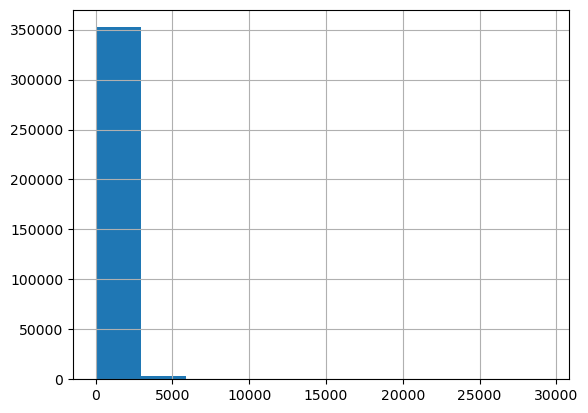

In [34]:
data['reviewText'].str.len().hist()

C:\Users\User\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\User\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: >

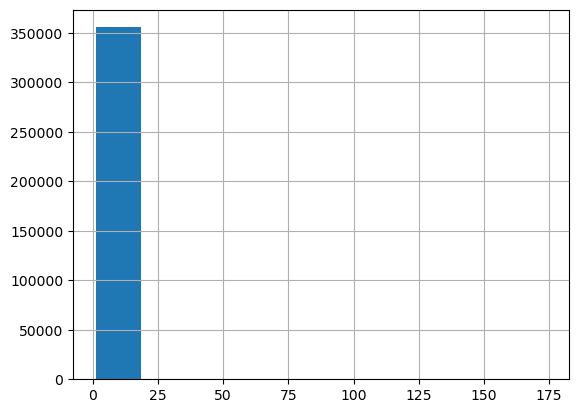

In [44]:
data['reviewText'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [50]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

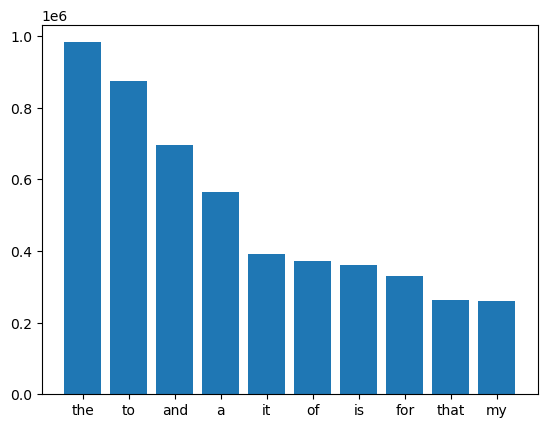

In [53]:
plot_top_stopwords_barchart(data['reviewText'])